In [32]:
import os 
import re
import numpy as np
import natsort as n
import scipy.io as sio
import matplotlib.pyplot as plt

M786656
(960,)
0.0 8
3.0 8
0.0 8
0.0 8
2.0 8
3.0 8
4.0 8
1.0 8
1.0 8
2.0 8
3.0 8
1.0 8
1.0 8
2.0 8
2.0 8
4.0 8
55
41.0
[0.0, 0.375, 0.0, 0.0, 0.25, 0.375, 0.5, 0.125, 0.125, 0.25, 0.375, 0.125, 0.125, 0.25, 0.25, 0.5]


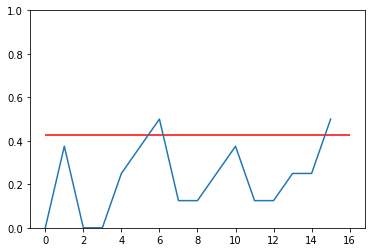

In [12]:
rootdir = '/home/pouple/PhD/Data/Analysis'
pattern = re.compile('M[0-9]{6}')
mice = [os.path.join(rootdir, path) for path in os.listdir(rootdir) if pattern.match(path)]
mice = ['/home/pouple/PhD/Data/Analysis/M786656/']
tag = 'Catch_frequency'

dats = []
for mouse in mice:
    mouse_id = os.path.basename(os.path.normpath(mouse))
    print(mouse_id)

    paths = [os.path.join(mouse, path, 'Stims.mat') for path in os.listdir(mouse)]
    datafiles = [sio.loadmat(path) for path in paths if os.path.exists(path) and tag in path and '21-Jul' in path]
    
    if len(datafiles):
        # Get sneakpeak into evolution 
        corrs, stims, outs = [], [], []
        for i, data in enumerate(datafiles):
            
            stim = data['ExperimentInfo']['TrialSequence'][0][0][0]
            corr = data['ExperimentInfo']['Correct'][0][0][0]
            out = data['ExperimentInfo']['OutComeTrials'][0][0][0]
            
            stims.append(stim)
            corrs.append(corr)
            outs.append(out)
        
        stims = np.array([i for s in stims for i in s])[:960]
        corrs = np.array([i for s in corrs for i in s])[:960]
        outs = np.array([i for s in outs for i in s])[:960]
        
        print(stims.shape)
        scores = {}
        for t in np.arange(3, 19):
            curr_stim = np.where(stims == t)[0]
            scores[t] = np.sum(corrs[curr_stim])/len(curr_stim)
            print(len(curr_stim)-np.sum(corrs[curr_stim]), len(curr_stim))
                
        scs = [1-scores[k] for k in scores]
    
        idx_gos = np.where(stims == 1)[0]
        idx_blank = np.where(stims == 0)[0]
        
        print(np.sum(corrs[idx_blank]))
        print(len(idx_blank) - np.sum(corrs[idx_blank]))
        
        print(scs)
        
        blank_lvl = 1 - np.sum(corrs[idx_blank]/len(idx_blank))
        plt.plot(scs)
        plt.hlines(blank_lvl, 0, len(scs), color='red')
        plt.ylim((0, 1))

    
plt.savefig('656.svg')

M786658
(1280,)
2.0 8
1.0 8
2.0 8
2.0 8
3.0 8
0.0 8
1.0 8
1.0 8
0.0 8
0.0 8
2.0 8
5.0 8
1.0 8
0.0 8
3.0 8
3.0 8
106
22.0
[0.25, 0.125, 0.25, 0.25, 0.375, 0.0, 0.125, 0.125, 0.0, 0.0, 0.25, 0.625, 0.125, 0.0, 0.375, 0.375]


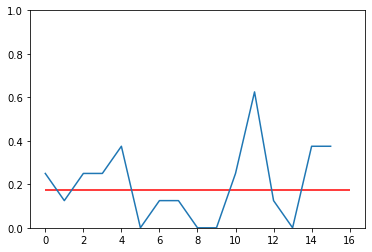

In [14]:
rootdir = '/home/pouple/PhD/Data/Analysis'
pattern = re.compile('M[0-9]{6}')
mice = [os.path.join(rootdir, path) for path in os.listdir(rootdir) if pattern.match(path)]
mice = ['/home/pouple/PhD/Data/Analysis/M786658/']
tag = 'Catch_frequency'

dats = []
for mouse in mice:
    mouse_id = os.path.basename(os.path.normpath(mouse))
    print(mouse_id)

    paths = [os.path.join(mouse, path, 'Stims.mat') for path in os.listdir(mouse)]
    datafiles = [sio.loadmat(path) for path in paths if os.path.exists(path) and tag in path and '21-Jul' in path]
    
    if len(datafiles):
        # Get sneakpeak into evolution 
        corrs, stims, outs = [], [], []
        for i, data in enumerate(datafiles):
            
            stim = data['ExperimentInfo']['TrialSequence'][0][0][0]
            corr = data['ExperimentInfo']['Correct'][0][0][0]
            out = data['ExperimentInfo']['OutComeTrials'][0][0][0]
            
            stims.append(stim)
            corrs.append(corr)
            outs.append(out)
        
        stims = np.array([i for s in stims for i in s])
        corrs = np.array([i for s in corrs for i in s])
        outs = np.array([i for s in outs for i in s])
        
        print(stims.shape)
        scores = {}
        for t in np.arange(3, 19):
            curr_stim = np.where(stims == t)[0]
            scores[t] = np.sum(corrs[curr_stim])/len(curr_stim)
            print(len(curr_stim)-np.sum(corrs[curr_stim]), len(curr_stim))
                
        scs = [1-scores[k] for k in scores]
    
        idx_gos = np.where(stims == 1)[0]
        idx_blank = np.where(stims == 0)[0]
        
        print(np.sum(corrs[idx_blank]))
        print(len(idx_blank) - np.sum(corrs[idx_blank]))
        
        print(scs)
        
        blank_lvl = 1 - np.sum(corrs[idx_blank]/len(idx_blank))
        plt.plot(scs)
        plt.hlines(blank_lvl, 0, len(scs), color='red')
        plt.ylim((0, 1))

    
plt.savefig('656.svg')

M786658
/home/pouple/PhD/Data/Analysis/M786658/Catch_frequency_GovsSounds_21-Jul-2022_124549/Stims.mat
/home/pouple/PhD/Data/Analysis/M786658/Catch_frequency_GovsSounds_21-Jul-2022_133839/Stims.mat
/home/pouple/PhD/Data/Analysis/M786658/Catch_frequency_GovsSounds_22-Jul-2022_115602/Stims.mat
/home/pouple/PhD/Data/Analysis/M786658/Catch_frequency_GovsSounds_22-Jul-2022_124758/Stims.mat
/home/pouple/PhD/Data/Analysis/M786658/Catch_frequency_GovsSounds_25-Jul-2022_122546/Stims.mat
/home/pouple/PhD/Data/Analysis/M786658/Catch_frequency_GovsSounds_26-Jul-2022_125721/Stims.mat
/home/pouple/PhD/Data/Analysis/M786658/Catch_frequency_GovsSounds_26-Jul-2022_135308/Stims.mat
/home/pouple/PhD/Data/Analysis/M786658/Catch_frequency_GovsSounds_26-Jul-2022_135411/Stims.mat
/home/pouple/PhD/Data/Analysis/M786658/Catch_frequency_GovsSounds_27-Jul-2022_150207/Stims.mat
/home/pouple/PhD/Data/Analysis/M786658/Catch_frequency_GovsSounds_27-Jul-2022_160612/Stims.mat
/home/pouple/PhD/Data/Analysis/M786658/Dis

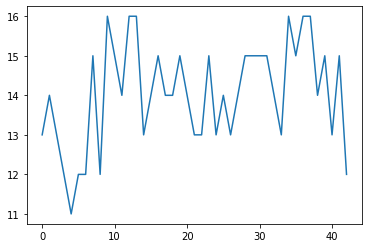

In [37]:
rootdir = '/home/pouple/PhD/Data/Analysis'
pattern = re.compile('M[0-9]{6}')
mice = [os.path.join(rootdir, path) for path in os.listdir(rootdir) if pattern.match(path)]
mice = ['/home/pouple/PhD/Data/Analysis/M786658/']
tag = 'Catch_frequency'

dats = []
for mouse in mice:
    mouse_id = os.path.basename(os.path.normpath(mouse))
    print(mouse_id)

    paths = [os.path.join(mouse, path, 'Stims.mat') for path in os.listdir(mouse)]
    for p in (n.natsorted(paths)):
        print(p)
    datafiles = [sio.loadmat(path) for path in n.natsorted(paths) if os.path.exists(path) and tag in path]
    
    if len(datafiles):
        # Get sneakpeak into evolution 
        corrs, stims, outs = [], [], []
        for i, data in enumerate(datafiles):
            
            stim = data['ExperimentInfo']['TrialSequence'][0][0][0]
            corr = data['ExperimentInfo']['Correct'][0][0][0]
            out = data['ExperimentInfo']['OutComeTrials'][0][0][0]
            
            stims.append(stim)
            corrs.append(corr)
            outs.append(out)
        
        stims = np.array([i for s in stims for i in s])
        corrs = np.array([i for s in corrs for i in s])
        outs = np.array([i for s in outs for i in s])
        
        idx_gos = np.where(stims == 1)[0]
        idx_nogos = np.where(stims == 2)[0]
        idx_blank = np.where(stims == 0)[0]
        
        idx_to_remove = np.concatenate((idx_gos, idx_nogos, idx_blank))
        
        intermediate_stims = np.delete(stims, idx_to_remove)
        intermediate_corrs = np.delete(corrs, idx_to_remove)
        
        print(intermediate_corrs)
        
        licks = []
        for i in range(int(len(intermediate_corrs)/16) - 1):
            licks.append(np.sum(intermediate_corrs[16*i:16*(i+1)]))
            
        
        plt.plot(licks)
        plt.show()


In [13]:
from scipy import stats
data = [
    [0, 8],
    [41, 55]
]

chi2_statistic, p_value, dof, ex = stats.chi2_contingency( data )
print(p_value)

0.04567305364582482
